In [3]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

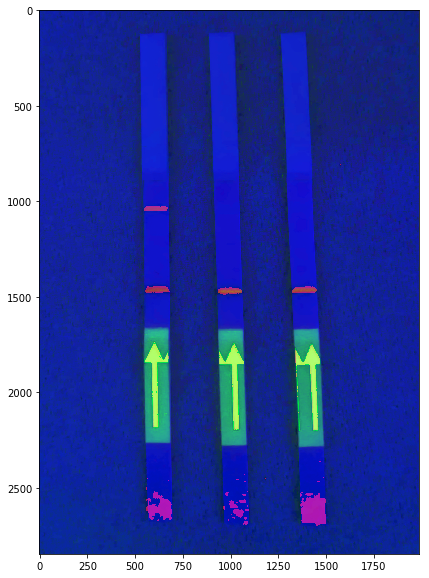

In [4]:
# image = cv2.imread('shapes_and_colors.png')
# image = cv2.imread('strips5.png')
image = cv2.imread('images/strips6.jpg')
# image = cv2.medianBlur(image, 5)
image = cv2.GaussianBlur(image,(5,5),0)
# image = cv2.bilateralFilter(image, 9, 75, 75)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

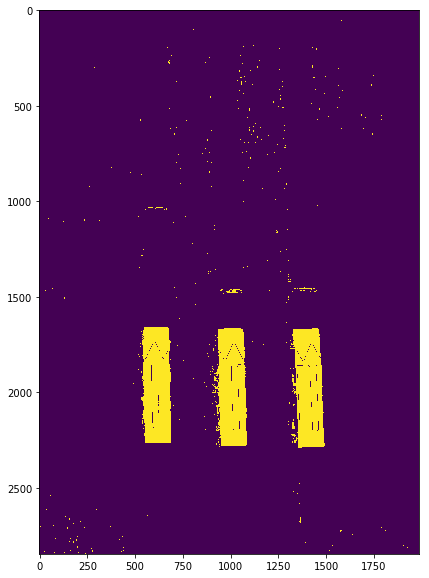

In [5]:
lower_red = np.array([0,50,50]) 
upper_red = np.array([10,255,255]) 
mask1 = cv2.inRange(hsv, lower_red, upper_red) 

lower_red = np.array([170,50,50]) 
upper_red = np.array([180,255,255]) 
mask2 = cv2.inRange(hsv, lower_red, upper_red) 

red_mask = mask1 + mask2

lower_green = np.array([20,50,50]) 
upper_green = np.array([90,255,255]) 
green_mask = cv2.inRange(hsv, lower_green, upper_green) 

mask = red_mask + green_mask

res = cv2.bitwise_and(image, image, mask = mask) 

plt.imshow(mask) 

# image[np.where((res!=[0, 0, 0]).all(axis=2))] = [150, 150, 150]
# plt.imshow(image) 

In [6]:
# find contours in the thresholded image and initialize the
# shape detector

# Tutorial on contour detection:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
# And
# "For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection."
# https://docs.opencv.org/3.3.1/d3/d05/tutorial_py_table_of_contents_contours.html

# resized = imutils.resize(mask, width=300)
# ratio = mask.shape[0] / float(resized.shape[0])

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# sd = ShapeDetector()

maxCenterY = 1700

print("Detected",len(cnts),"shapes")

boxes1 = []
for c in cnts:
    area = cv2.contourArea(c)
    M = cv2.moments(c)    
    if area < 10000 or M["m00"] == 0: continue
    
#     cX = int((M["m10"] / M["m00"]) * ratio)
#     cY = int((M["m01"] / M["m00"]) * ratio)
#     shape = sd.detect(c, 0.1)
    
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)    
    
    
    if maxCenterY < box[1][1] or maxCenterY < box[2][1]: continue
        
    print("Found suitable box")
    print(box)
    print(area)
    boxes1 += [box]
    
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
#     c = c.astype("float")
#     c *= ratio
#     c = c.astype("int")
    

    
#     image = cv2.drawContours(image, [box], 0, (0,0,255), 2)
#     image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)    
    
#     cv2.drawContours(resized, [c], -1, (0, 255, 0), 2)
#     cv2.putText(resized, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
# plt.imshow(image)    

Detected 1206 shapes
Found suitable box
[[1321 2289]
 [1309 1666]
 [1481 1663]
 [1493 2285]]
81413.0
Found suitable box
[[ 920 2283]
 [ 902 1661]
 [1075 1656]
 [1093 2278]]
83570.0
Found suitable box
[[ 532 2266]
 [ 532 1658]
 [ 690 1658]
 [ 690 2266]]
81297.5


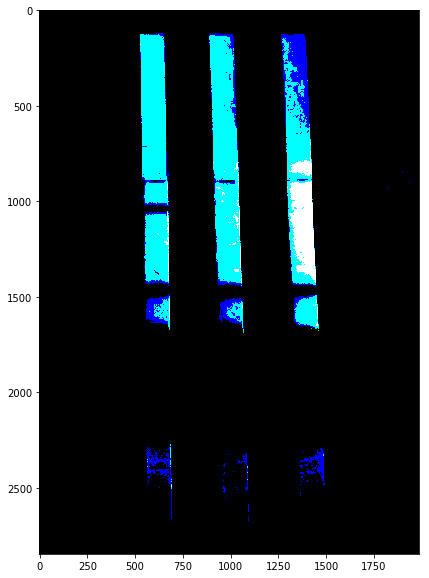

In [7]:
# grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(image, 190, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')


# cv2.imwrite("threshold.jpg", thresh1)

# ret, thresh2 = cv2.threshold(thresh1, 250, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh2, cmap='gray')


# ret2, thresh2 = cv2.threshold(grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(thresh2, cmap='gray')

In [8]:
gray = cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY)

maxTopY = 500

cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#sd = ShapeDetector()

print("Detected",len(cnts),"shapes")

boxes2 = []
for c in cnts:
    area = cv2.contourArea(c)
    M = cv2.moments(c)    
    if area < 10000 or M["m00"] == 0: continue
        
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    if maxTopY < box[1][1] or maxTopY < box[2][1]: continue
        
#     cX = int((M["m10"] / M["m00"]) * ratio)
#     cY = int((M["m01"] / M["m00"]) * ratio)
#     shape = sd.detect(c, 0.1)
    
    print("Found suitable box")
    print(box)
    print(area)
    boxes2 += [box]

Detected 192 shapes
Found suitable box
[[1316 1453]
 [1265  125]
 [1399  119]
 [1451 1447]]
166585.0
Found suitable box
[[ 930 1454]
 [ 888  122]
 [1022  117]
 [1064 1449]]
167892.0
Found suitable box
[[ 541 1033]
 [ 525  123]
 [ 664  120]
 [ 680 1030]]
114434.0


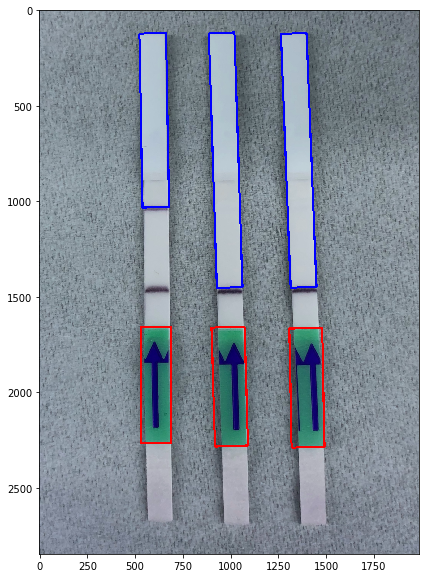

In [9]:
for box in boxes1:
    image = cv2.drawContours(image, [box], 0, (255,0,0), 10)

for box in boxes2:
    image = cv2.drawContours(image, [box], 0, (0,0,255), 10)
    
plt.imshow(image)  